In [44]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [3]:
#Loading dataset
wine = pd.read_csv('wine-quality.csv')

In [4]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
#checking to see if there's any null variables
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Preprocessing Data
#preprocessing the Data
bins = (2,6.5,9)
group_names = ['bad', 'good']
wine['quality']= pd.cut(wine['quality'], bins = bins, labels= group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [9]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [10]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

#Bad becomes 0 and good becomes 1 

In [11]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [13]:
wine['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

C:\Users\euelf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

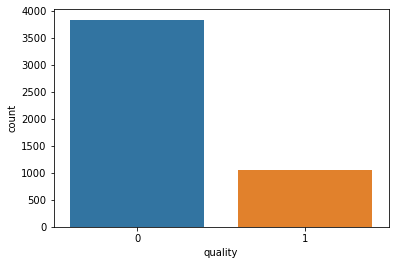

In [14]:
sns.countplot(wine['quality'])

In [15]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [16]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
#Applying Standard scaling to get optimized result

sc = StandardScaler()

In [18]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# Random Forest Classifier

In [22]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)


In [26]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       753
           1       0.84      0.59      0.70       227

    accuracy                           0.88       980
   macro avg       0.87      0.78      0.81       980
weighted avg       0.88      0.88      0.87       980



In [27]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[728  25]
 [ 92 135]]


This confusion matrix result is telling that 
for the BAD wines 728 were correctly labeled and 25 were incorectly labeled as good

and 

for the GOOD wines 92 were labeled correclty while 135 were labeled incorrect

# Random forest gives the accuracy of 88%

In [46]:
#Accuracy score calculation

rf_score = accuracy_score(y_test, pred_rfc)

rf_score

0.8806122448979592

# SVM Classifier

In [36]:
clf = svm.SVC()
clf.fit(X_train, y_train)


In [37]:
#Let's see how our model performed
print (classification_report(y_test, pred_clf))
print (confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       753
           1       0.75      0.34      0.47       227

    accuracy                           0.82       980
   macro avg       0.79      0.65      0.68       980
weighted avg       0.81      0.82      0.79       980

[[727  26]
 [150  77]]


In [47]:
#Accuracy score calculation
svm_accuracy = accuracy_score(y_test, pred_clf)

svm_accuracy

0.8204081632653061

# Neural Network

In [39]:
mlpc = MLPClassifier(hidden_layer_sizes = (11,11,11), max_iter = 500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

C:\Users\euelf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
#Let's see how our model performed
print (classification_report(y_test, pred_mlpc))
print (confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       753
           1       0.63      0.46      0.53       227

    accuracy                           0.81       980
   macro avg       0.74      0.69      0.71       980
weighted avg       0.80      0.81      0.80       980

[[692  61]
 [122 105]]


In [49]:
#Accuracy score calculation
mlpc_accuracy = accuracy_score(y_test, pred_mlpc)

mlpc_accuracy

0.813265306122449

## Important step after models calculation
## prediction

In [50]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,0


In [52]:
Xnew = [[7.3,0.58,0.00,2.0,0.078,15.0,21.0,0.9946,3.36,0.47,10.0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([0])

In [54]:
ynew2 = mlpc.predict(Xnew)
ynew2

array([0])

In [55]:
ynew3 = clf.predict(Xnew)
ynew3

array([0])